In [36]:
#Code from https://github.com/qiskit-community/ibm-quantum-challenge-spring-2023/blob/main/solutions/lab_3/lab3_solution.ipynb

In [37]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import bitstring
from qiskit_aer import AerSimulator
from scipy.optimize import curve_fit

theta = 2*np.pi*(0.125)

In [38]:
circuit = QuantumCircuit(2, 2)  # A circuit with 2 qubits and 2 classical bits
circuit.x(0)
circuit.measure(0,0)

sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()
counts

{'01': 1000}

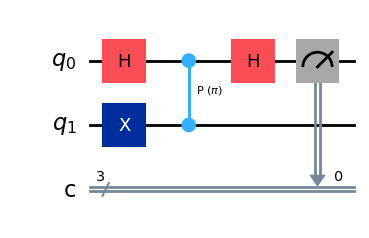

In [39]:
def step_1_circuit(qr: QuantumRegister, cr: ClassicalRegister, angle) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    qc = QuantumCircuit(qr, cr)

    ########## your code goes here #######

    ##1 Initialization

    q0, q1 = qr
    # apply Hadamard on the auxiliary qubit
    qc.h(q0)
    # put the system qubit into the |1> state
    qc.x(q1)

    ##2 Apply control-U operator as many times as needed to get the least significant phase bit

    # we want to apply controlled-S 2^k times
    k = 2
    # calculate the angle of CPhase corresponding to 2^k applications of angle
    cphase_angle = angle * 2**k
    # apply the controlled phase gate
    qc.cp(cphase_angle, q0, q1)

    ##3 Measure the auxiliary qubit in x-basis into the first classical bit

    # apply Hadamard to change to the X basis
    qc.h(q0)
    # measure the auxiliary qubit into the first classical bit
    c0, _, _ = cr
    qc.measure(q0, c0)

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
qc = step_1_circuit(qr, cr, theta)
qc.draw("mpl")

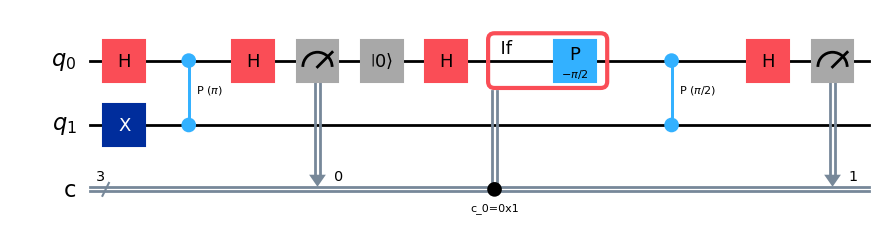

In [40]:
def step_2_circuit(qr: QuantumRegister, cr: ClassicalRegister, angle) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    # begin with the circuit from Step 1
    qc = step_1_circuit(qr, cr, angle)

    ########## your code goes here #######

    ##1 Reset and re-initialize the auxiliary qubit

    q0, q1 = qr
    # reset the auxiliary qubit
    qc.reset(q0)
    # apply Hadamard on the auxiiliary qubit
    qc.h(q0)

    ##2 Apply phase correction conditioned on the first classical bit

    c0, c1, _ = cr
    with qc.if_test((c0, 1)):
        qc.p(-np.pi / 2, q0)

    ##3 Apply control-U operator as many times as needed to get the next phase bit

    # we want to apply controlled-S 2^k times
    k = 1
    # calculate the angle of CPhase corresponding to 2^k applications of controlled-S
    cphase_angle = angle * 2**k
    # apply the controlled phase gate
    qc.cp(cphase_angle, q0, q1)

    ##4 Measure the auxiliary qubit in x-basis into the second classical bit

    # apply Hadamard to change to the X basis
    qc.h(q0)
    # measure the auxiliary qubit into the first classical bit
    qc.measure(q0, c1)

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
qc = step_2_circuit(qr, cr, theta)
qc.draw("mpl")

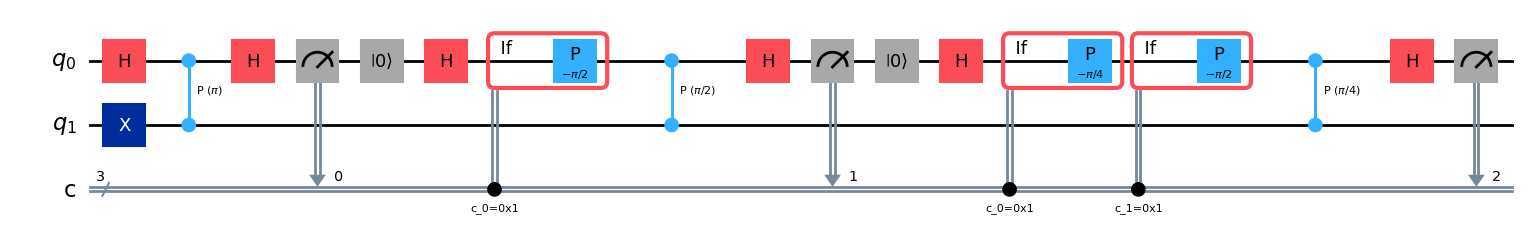

In [41]:
def step_3_circuit(qr: QuantumRegister, cr: ClassicalRegister, angle) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    # begin with the circuit from Step 1
    qc = step_2_circuit(qr, cr, angle)

    ########## your code goes here #######

    ##1 Reset and re-initialize the auxiliary qubit

    q0, q1 = qr
    # reset the auxiliary qubit
    qc.reset(q0)
    # apply Hadamard on the auxiiliary qubit
    qc.h(q0)

    ##2 Apply phase correction conditioned on the first classical bit

    c0, c1, c2 = cr
    with qc.if_test((c0, 1)):
        qc.p(-np.pi/4, q0)

    with qc.if_test((c1, 1)):
        qc.p(-np.pi/2, q0)

    ##3 Apply control-U operator as many times as needed to get the next phase bit

    # we want to apply controlled-S 2^k times
    k = 0
    # calculate the angle of CPhase corresponding to 2^k applications of controlled-S
    cphase_angle = angle * 2**k
    # apply the controlled phase gate
    qc.cp(cphase_angle, q0, q1)

    ##4 Measure the auxiliary qubit in x-basis into the second classical bit

    # apply Hadamard to change to the X basis
    qc.h(q0)
    # measure the auxiliary qubit into the first classical bit
    qc.measure(q0, c2)

    return qc

qr = QuantumRegister(2, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
qc = step_3_circuit(qr, cr, theta)
qc.draw("mpl")

In [42]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
counts

{'001': 1000}

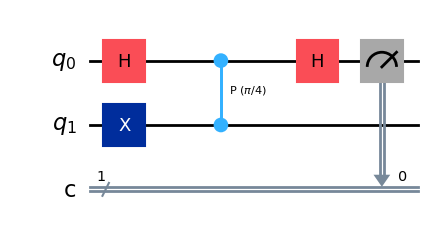

In [43]:
def step_1_circuit(qr: QuantumRegister, cr: ClassicalRegister, angle) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    qc = QuantumCircuit(qr, cr)

    ########## your code goes here #######

    ##1 Initialization

    q0, q1 = qr
    # apply Hadamard on the auxiliary qubit
    qc.h(q0)
    # put the system qubit into the |1> state
    qc.x(q1)

    ##2 Apply control-U operator as many times as needed to get the least significant phase bit

    # we want to apply controlled-S 2^k times
    k = 0
    # calculate the angle of CPhase corresponding to 2^k applications of angle
    cphase_angle = angle * 2**k
    # apply the controlled phase gate
    qc.cp(cphase_angle, q0, q1)

    ##3 Measure the auxiliary qubit in x-basis into the first classical bit

    # apply Hadamard to change to the X basis
    qc.h(q0)
    # measure the auxiliary qubit into the first classical bit
    c0 = cr
    qc.measure(q0, c0)

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)
qc = step_1_circuit(qr, cr, theta)
qc.draw("mpl")

In [44]:
# def take_right_bit(bitstring: str, pos: int):
#     bits = [i for i in bitstring]
#     right_bit = bits[len(bits)- 1 - pos]
#     return right_bit

def iqpe(angle: float, steps: int, bits_list = []):
    if steps == 1:
        qr = QuantumRegister(2, "q")
        cr = ClassicalRegister(1, "c")
        return step_1_circuit(qr,cr,angle)                  #funktioniert!!!
    else:
        qr = QuantumRegister(2,"q")
        cr = ClassicalRegister(steps, "c")
        q0, q1 = qr

        list = []
        for i in range(97, 97+steps):                               #hier die Liste mit dem Classical Register
            list.append("{:c}".format(i))
        list = cr
        qc = QuantumCircuit(qr,cr)

        # apply Hadamard on the auxiliary qubit
        if not bits_list:                                                                                           #"Normaler" QPE-Circuit
            qc.h(q0)
            # put the system qubit into the |1> state
            qc.x(q1)
            ##2 Apply control-U operator as many times as needed to get the least significant phase bit
            # we want to apply controlled-S 2^k times
            k = steps-1
            # calculate the angle of CPhase corresponding to 2^k applications of angle
            cphase_angle = angle * 2**k
            # apply the controlled phase gate
            qc.cp(cphase_angle, q0, q1)
            ##3 Measure the auxiliary qubit in x-basis into the first classical bit
            # apply Hadamard to change to the X basis
            qc.h(q0)
            # measure the auxiliary qubit into the first classical bit                   
            qc.measure(q0, list[0])

            for i in range(1,steps):                                                                                                   
                qc.reset(q0)
                # apply Hadamard on the auxiiliary qubit
                qc.h(q0)

                ##2 Apply phase correction conditioned on the first classical bit

                for j in range(i):
                    with qc.if_test((list[j], 1)):
                        qc.p((-2*np.pi)/(2**(i-j+1)), q0)

                ##3 Apply control-U operator as many times as needed to get the next phase bit

                # we want to apply controlled-S 2^k times
                k = steps - i - 1
                # calculate the angle of CPhase corresponding to 2^k applications of controlled-S
                cphase_angle = angle * 2**k
                # apply the controlled phase gate
                qc.cp(cphase_angle, q0, q1)

                ##4 Measure the auxiliary qubit in x-basis into the second classical bit

                # apply Hadamard to change to the X basis
                qc.h(q0)
                # measure the auxiliary qubit into the first classical bit
                qc.measure(q0, list[i])
            
            return qc

        else:
            qc.x(q1)
            for j in range(len(bits_list)):
                qc.reset(q0)
                if bits_list[j] == "1":
                    qc.x(q0)
                    qc.measure(q0, list[j])


        qc.reset(q0)
        # apply Hadamard on the auxiiliary qubit
        qc.h(q0)

        ##2 Apply phase correction conditioned on the first classical bit

        for j in range(steps-1):
            if bits_list[j] == "1":
                qc.p((-2*np.pi)/(2**(steps-j)), q0)
            # with qc.if_test((list[j], 1)):
            #     qc.p((-2*np.pi)/(2**(i-j+1)), q0)

        # calculate the angle of CPhase corresponding to 2^k applications of controlled-S
        cphase_angle = angle
        # apply the controlled phase gate
        qc.cp(cphase_angle, q0, q1)

        ##4 Measure the auxiliary qubit in x-basis into the second classical bit

        # apply Hadamard to change to the X basis
        qc.h(q0)
        # measure the auxiliary qubit into the first classical bit
        qc.measure(q0, list[steps-1])
        
        return qc
#Funktioniert

def iqpe_improved(angle: float, shots_per_it: list):                            #Länge der Liste gibt mir meine depth bzw. #Iterationen
    bits_list=[]
    if  len(shots_per_it) == 1:
        qr = QuantumRegister(2, "q")
        cr = ClassicalRegister(1, "c")
        return step_1_circuit(qr,cr,angle)                  #funktioniert!!!
    else:
        steps = len(shots_per_it) + 1
        qr = QuantumRegister(2,"q")
        cr = ClassicalRegister(1, "c")
        q0, q1 = qr

        list = []
        list.append("c0")
        list = cr

        qc = QuantumCircuit(qr,cr)

        # apply Hadamard on the auxiliary qubit                                             
        qc.h(q0)
        # put the system qubit into the |1> state
        qc.x(q1)
        ##2 Apply control-U operator as many times as needed to get the least significant phase bit
        # we want to apply controlled-S 2^k times
        k = steps-1
        # calculate the angle of CPhase corresponding to 2^k applications of angle
        cphase_angle = angle * 2**k
        # apply the controlled phase gate
        qc.cp(cphase_angle, q0, q1)
        ##3 Measure the auxiliary qubit in x-basis into the first classical bit
        # apply Hadamard to change to the X basis
        qc.h(q0)
        # measure the auxiliary qubit into the first classical bit                                    
        qc.measure(q0, list[0])                                                                                                     #Bis hier, nur step_1_circuit
        sim = AerSimulator()
        job = sim.run(qc, shots=shots_per_it[0])
        result = job.result()
        counts = result.get_counts()
        print("Counts vom ersten Bit: ", counts)
        max_val = max(counts.values())
        max_keys = []
        for key in counts:
            if counts[key] == max_val:
                max_keys.append(key)
        chosen_one = max_keys[0]
        bits_list.append(chosen_one)

        for i in range(1,steps-1):                                                                                                    #Ab hier, gehts weiter über die for schleife
            qr = QuantumRegister(2,"q")
            cr = ClassicalRegister(1, "c")
            q0, q1 = qr
            list = []
            list.append("c0")
            list = cr
            qc = QuantumCircuit(qr,cr)

            # if bits_list[i-1] == "1":
            #     qc.x(q0)

            # apply Hadamard on the auxiiliary qubit
            qc.h(q0)
            qc.x(q1)
            ##2 Apply phase correction conditioned on the first classical bit
            for j in range(i):
                if bits_list[j] == "1":
                    qc.p((-2*np.pi)/(2**(i-j+1)), q0)
            ##3 Apply control-U operator as many times as needed to get the next phase bit
            # we want to apply controlled-S 2^k times
            k = steps - i - 1
            # calculate the angle of CPhase corresponding to 2^k applications of controlled-S
            cphase_angle = angle * 2**k
            # apply the controlled phase gate
            qc.cp(cphase_angle, q0, q1)
            ##4 Measure the auxiliary qubit in x-basis into the second classical bit
            # apply Hadamard to change to the X basis
            qc.h(q0)
            # measure the auxiliary qubit into the first classical bit
            qc.measure(q0, list[0])
            sim = AerSimulator()
            job = sim.run(qc, shots=shots_per_it[i])
            result = job.result()
            counts = result.get_counts()
            max_val = max(counts.values())
            max_keys = []
            for key in counts:
                if counts[key] == max_val:
                    max_keys.append(key)
            chosen_one = max_keys[0]
            bits_list.append(chosen_one)
            print("Die Counts von den anderen Bits: ", counts)
        print("Das ist die bits_list: ", bits_list)
        return iqpe(angle, steps , bits_list)
        

#Funktioniert
def convert(bin: str):                  #konvertiert den bitstring in deciaml, e.g. 0110 = 0.375
    k = list(bin)
    a = [int(i) for i in k]
    n = 0
    for i in range(len(a)):
        if a[i] == 1:
            n += 1/2**(i+1)
    return n
#Funktioniert

def mean(x: list, y: list):                 #bildet den Mittelwert unter den Shots einer Messung
    m = 0
    total = 0
    for i in range(len(x)):
        m += x[i]*y[i]
        total += y[i]
    m = m*(1/total)
    return m
#Funktioniert
def diff_with_max(x: list, y: list, angle: float):             #gibt den Messwert raus, der am meisten gemessen wurde unter den Shots
    ind = 0
    max_element = y[0]
    for i in range (1,len(y)):
        if y[i] > max_element:
            max_element = y[i]
            ind = i
    diff_max = np.abs(x[ind] - angle)
    return diff_max

def closest_bin(n: float, prec: int):
    closest = 10
    steps = 2**(-prec)
    bin_list = [i*steps for i in range(2**prec)]
    for i in bin_list:
        if np.abs(n - i) < np.abs(closest-n):
            closest = i
    return closest
#Funktioniert

{'001': 8, '110': 4, '000': 6, '010': 31, '100': 54, '101': 12, '111': 6, '011': 879}
Success probability: 0.879


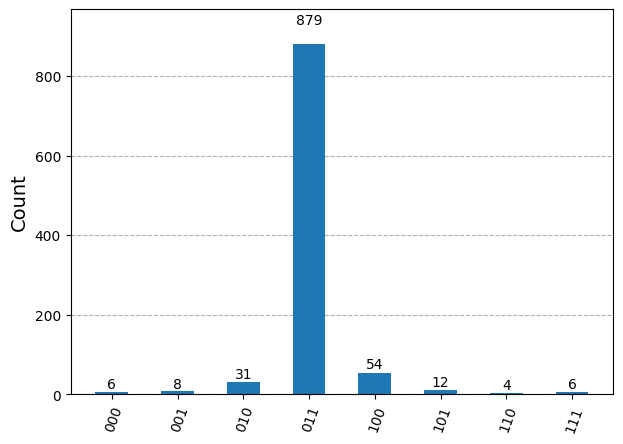

In [45]:
depth = 3
angle = 0.4
theta = 2*np.pi*angle
qc = iqpe(theta,depth)
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1e3)
result = job.result()
counts = result.get_counts()
print(counts)


success_probability = counts["011"] / counts.shots()          #https://www.rapidtables.com/convert/number/decimal-to-binary.html   0.25 --> 0.01 --> 010...000 ,erste 0 fällt weg
print(f"Success probability: {success_probability}")


fig, ax1 = plt.subplots(figsize=(7,5))

ax1 = plot_histogram(counts, ax = ax1)

#plt.vlines(0.5 , 0 , max(counts.values()), color = "red", linestyle = "dotted", label = "Desired Value")
#plt.legend()
plt.show()

Counts vom ersten Bit:  {'0': 12, '1': 38}
Die Counts von den anderen Bits:  {'1': 4, '0': 46}
Die Counts von den anderen Bits:  {'1': 50}
Das ist die bits_list:  ['1', '0', '1']
{'1101': 2, '0101': 998}
Success probability: 0.998


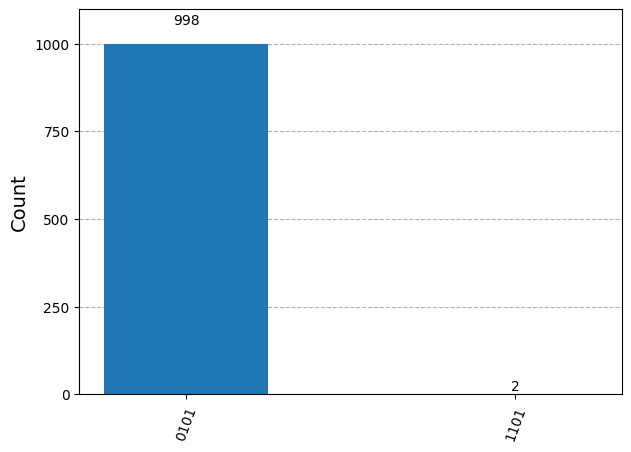

In [46]:
naja = [50,50,50]                          #depth = len(naja) + 1 !!!!!!           naja gibt an wie oft ich die ersten Schritte n-1 iterieren möchte, der n-te Schritt geht dann so oft wie die Shot Zahl
angle = 0.33
theta = 2*np.pi*angle
qc = iqpe_improved(theta,naja)
qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1e3)                        #gesamte Shot zahl = summe aus den Iterationen in naja + shots
result = job.result()
counts = result.get_counts()
print(counts)


success_probability = counts["0101"] / counts.shots()          #https://www.rapidtables.com/convert/number/decimal-to-binary.html   0.25 --> 0.01 --> 010...000 ,erste 0 fällt weg
print(f"Success probability: {success_probability}")


fig, ax1 = plt.subplots(figsize=(7,5))

ax1 = plot_histogram(counts, ax = ax1)

#plt.vlines(0.5 , 0 , max(counts.values()), color = "red", linestyle = "dotted", label = "Desired Value")
#plt.legend()
plt.show()

{'11101': 4, '00100': 13, '00010': 4, '10010': 70, '10101': 27, '11100': 12, '01010': 55, '01101': 475, '10000': 333, '01011': 91, '10111': 15, '10100': 29, '10110': 25, '01111': 2538, '10001': 128, '00101': 16, '01001': 35, '11010': 7, '01110': 5788, '11110': 7, '11001': 18, '00000': 6, '00011': 10, '00111': 20, '11011': 7, '11111': 8, '11000': 11, '01100': 166, '01000': 21, '00001': 6, '00110': 24, '10011': 31}
Success probability: 0.5788


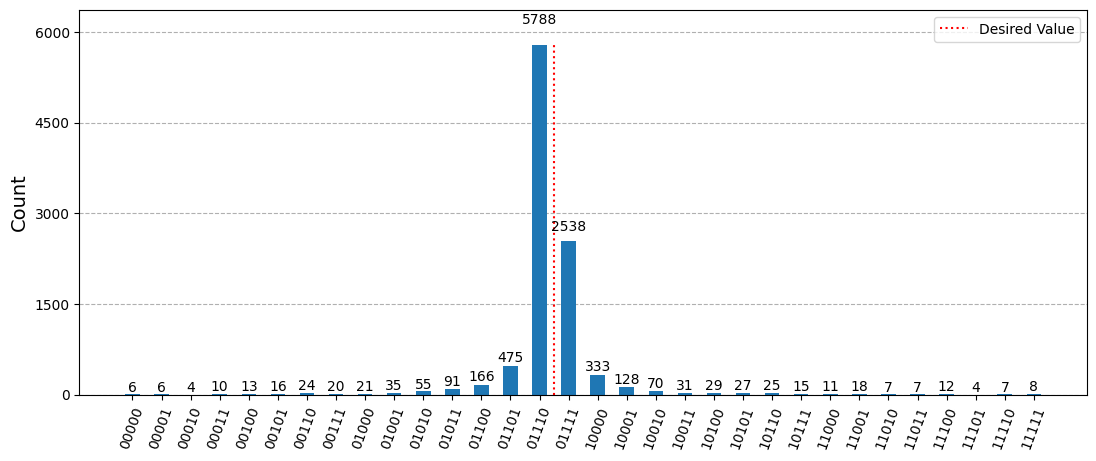

In [47]:
depth = 5
angle = 0.45
theta = 2*np.pi*angle
qc = iqpe(theta,depth)
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1e4)
result = job.result()
counts = result.get_counts()
print(counts)


success_probability = counts["01110"] / counts.shots()          #https://www.rapidtables.com/convert/number/decimal-to-binary.html   0.25 --> 0.01 --> 010...000 ,erste 0 fällt weg
print(f"Success probability: {success_probability}")


fig, ax1 = plt.subplots(figsize=(13,5))

ax1 = plot_histogram(counts, ax = ax1)

plt.vlines(14.5 , 0 , max(counts.values()), color = "red", linestyle = "dotted", label = "Desired Value")
plt.legend()
plt.show()


{'1011100': 27, '1011000': 31, '1110000': 24, '0010101': 125, '0100001': 616, '1101111': 16, '0000101': 44, '1110101': 41, '0000000': 31, '0011110': 293, '0111011': 172, '0011000': 144, '0001011': 62, '1000101': 73, '0111000': 241, '0100010': 725, '0110101': 379, '1110100': 31, '0000010': 34, '0111010': 196, '0001010': 48, '1101110': 34, '1011011': 36, '0110111': 287, '0100011': 920, '0110110': 347, '0001110': 64, '1110011': 29, '1000111': 70, '1010100': 39, '1100011': 34, '0100110': 2664, '0010111': 134, '1011101': 27, '0010110': 137, '0101000': 9436, '0011001': 165, '0100101': 1673, '0110100': 539, '0110000': 1428, '0110001': 1082, '0101101': 6282, '1000001': 115, '0011010': 192, '1100111': 31, '0101001': 30932, '0000001': 36, '1000011': 99, '0101111': 2112, '1000010': 109, '1111100': 37, '1111111': 37, '0001111': 92, '0101010': 823832, '1010010': 41, '1010000': 45, '0100111': 4503, '0000100': 41, '0101011': 82546, '0011101': 253, '1000000': 133, '1100010': 32, '1001110': 42, '011001

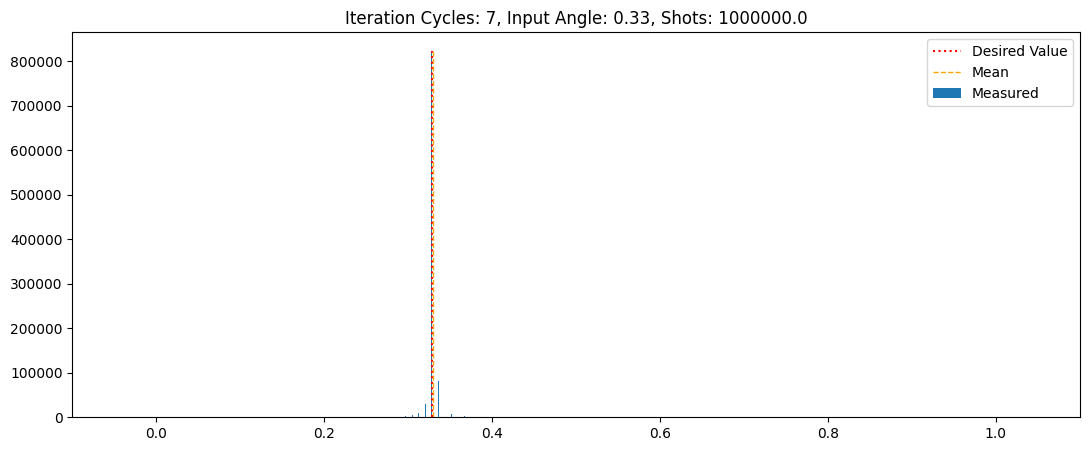

Difference between Mean of Mesurement and Desired Value:  0.0013069765625000063
Theoretical precision of QPE with the same depth:  0.0078125
Improvement by  5.977536418140599


In [82]:
depth = 7
angle = 0.33
theta = 2*np.pi*angle
qc = iqpe(theta,depth)
num = 1e6
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=int(num))
result = job.result()
counts = result.get_counts()
print(counts)

keys = counts.keys()
values = counts.values()

keys = [convert(i) for i in keys]
values = [i for i in values]

#print(keys)
#print(values)

fig, ax1 = plt.subplots(figsize=(13,5))

ax1 = plt.bar(keys, values, width = 2**(-depth-3), label="Measured")

avg = mean(keys, values)

print("Das ist der binäre Winkel den wir messen wollen: ", closest_bin(angle, depth))
print("Das ist der Mean unserer Messung: ", avg)

plt.vlines(closest_bin(angle, depth) , 0 , max(values), color = "red", linestyle = "dotted", label = "Desired Value")
plt.vlines(avg, 0 , max(values), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.title("Iteration Cycles: {}, Input Angle: {}, Shots: {}".format(depth, angle, num))
plt.xlim(-0.1,1.1)

plt.legend()
plt.show()

diff = np.abs(avg-closest_bin(angle, depth))
print("Difference between Mean of Mesurement and Desired Value: ", diff)
theory = 2**(-depth)
print("Theoretical precision of QPE with the same depth: ", theory)
print("Improvement by ", theory/diff)

# diff_max = diff_with_max(keys, values, angle)
# print("\n Difference between Maximum Value of Mesurement and Desired Value: ", diff_max)
# print("Improvement by ", theory/diff_max)

Counts vom ersten Bit:  {'0': 84, '1': 16}
Die Counts von den anderen Bits:  {'0': 3, '1': 97}
Die Counts von den anderen Bits:  {'1': 1, '0': 99}
Die Counts von den anderen Bits:  {'1': 100}
Die Counts von den anderen Bits:  {'0': 100}
Die Counts von den anderen Bits:  {'1': 100}
Das ist die bits_list:  ['0', '1', '0', '1', '0', '1']
{'1101010': 36, '0101010': 999964}
Das ist der binäre Winkel den wir messen wollen:  0.328125
Das ist der Mean unserer Messung:  0.32814299999999996


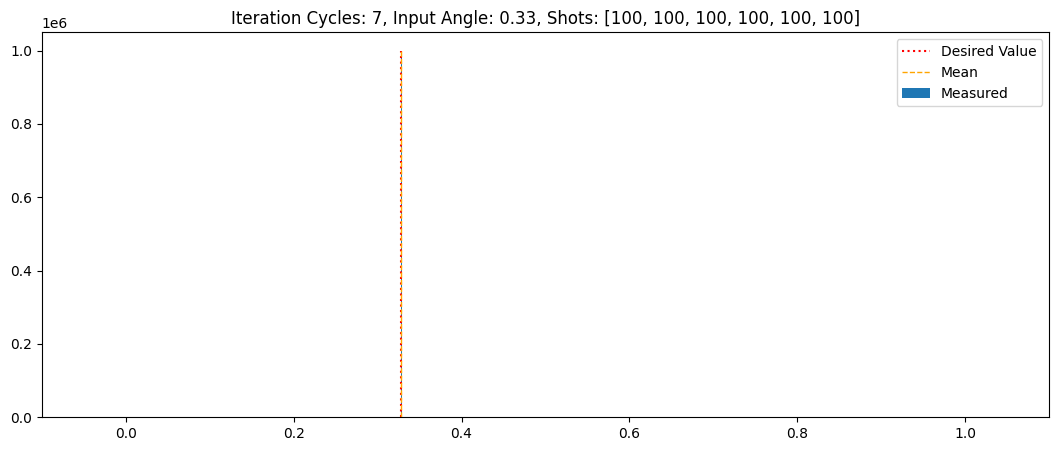

Difference between Mean of Mesurement and Desired Value:  1.799999999996249e-05
Theoretical precision of QPE with the same depth:  0.0078125
Improvement by  434.0277777786822

 Difference between Maximum Value of Mesurement and Desired Value:  0.0018750000000000155
Improvement by  4.166666666666632


In [49]:

angle = 0.33
theta = 2*np.pi*angle
naja = [100,100,100,100,100,100]
depth = len(naja)+1
qc = iqpe_improved(theta,naja)
num = 1e6
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=int(num))
result = job.result()
counts = result.get_counts()
print(counts)

keys = counts.keys()
values = counts.values()

keys = [convert(i) for i in keys]
values = [i for i in values]

#print(keys)
#print(values)

fig, ax1 = plt.subplots(figsize=(13,5))

ax1 = plt.bar(keys, values, width = 2**(-depth-3), label="Measured")

avg = mean(keys, values)

print("Das ist der binäre Winkel den wir messen wollen: ", closest_bin(angle, int(len(naja)+1)))
print("Das ist der Mean unserer Messung: ", avg)

plt.vlines(closest_bin(angle, int(len(naja)+1)) , 0 , max(values), color = "red", linestyle = "dotted", label = "Desired Value")
plt.vlines(avg, 0 , max(values), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.title("Iteration Cycles: {}, Input Angle: {}, Shots: {}".format(depth, angle, naja))
plt.xlim(-0.1,1.1)

plt.legend()
plt.show()

diff = np.abs(avg-closest_bin(angle, int(len(naja)+1)))
print("Difference between Mean of Mesurement and Desired Value: ", diff)
theory = 2**(-depth)
print("Theoretical precision of QPE with the same depth: ", theory)
print("Improvement by ", theory/diff)

# diff_max = diff_with_max(keys, values, angle)
# print("\n Difference between Maximum Value of Mesurement and Desired Value: ", diff_max)
# print("Improvement by ", theory/diff_max)

{'11110': 100, '10010': 741, '10101': 205, '11100': 79, '00001': 85, '00110': 191, '01000': 272, '01100': 1615, '11010': 116, '10001': 1352, '01001': 324, '00101': 141, '01010': 517, '01101': 4686, '10000': 3679, '10011': 492, '01110': 57348, '01111': 25463, '01011': 802, '10110': 192, '10111': 178, '10100': 308, '11101': 87, '11001': 128, '00000': 82, '11000': 122, '11011': 117, '11111': 79, '00111': 201, '00011': 101, '00100': 116, '00010': 81}


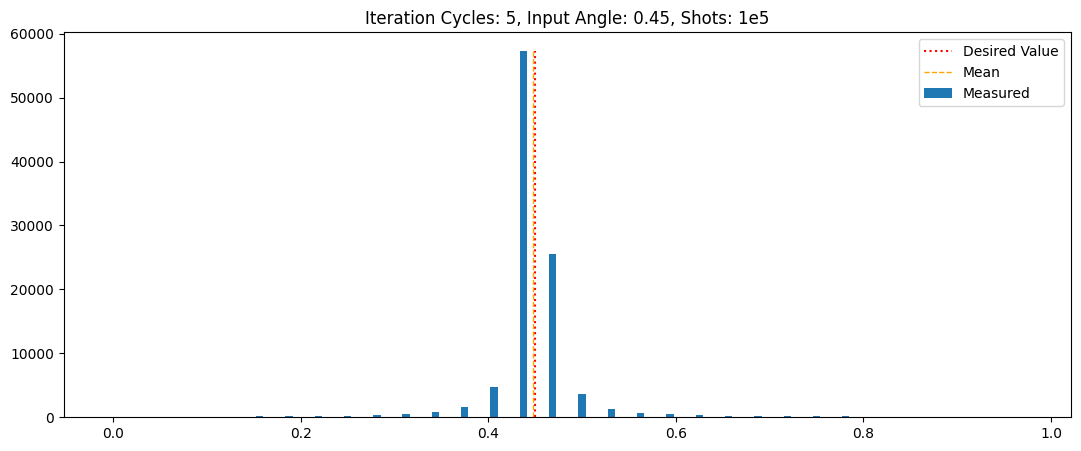

Difference between Mean of Mesurement and Desired Value:  0.0017890624999999938
Theoretical precision of QPE with the same depth:  0.03125
Improvement by  17.467248908297005

 Difference between Maximum Value of Mesurement and Desired Value:  0.012500000000000011
Improvement by  2.499999999999998


In [50]:
depth = 5
angle = 0.45
theta = 2*np.pi*angle
qc = iqpe(theta,depth)
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1e5)
result = job.result()
counts = result.get_counts()
print(counts)

keys = counts.keys()
values = counts.values()

keys = [convert(i) for i in keys]
values = [i for i in values]

#print(keys)
#print(values)

fig, ax1 = plt.subplots(figsize=(13,5))

ax1 = plt.bar(keys, values, width = 2**(-depth-2), label="Measured")

avg= mean(keys, values)

plt.vlines(angle , 0 , max(values), color = "red", linestyle = "dotted", label = "Desired Value")
plt.vlines(avg, 0 , max(values), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.title("Iteration Cycles: 5, Input Angle: 0.45, Shots: 1e5")

plt.legend()
plt.show()

diff = np.abs(avg-angle)
print("Difference between Mean of Mesurement and Desired Value: ", diff)
theory = 2**(-depth)
print("Theoretical precision of QPE with the same depth: ", theory)
print("Improvement by ", theory/diff)


diff_max = diff_with_max(keys, values, angle)
print("\n Difference between Maximum Value of Mesurement and Desired Value: ", diff_max)
print("Improvement by ", theory/diff_max)

{'00101100': 1, '11000000': 1, '10001001': 1, '11100111': 1, '10111110': 1, '01010110': 1, '10110101': 1, '10110001': 1, '00011100': 1, '11000111': 1, '10110100': 2, '10110000': 9, '10100101': 131, '10110110': 2, '10011001': 5, '10000100': 1, '11000110': 1, '10101010': 9, '10011111': 29, '10101101': 10, '00010000': 1, '10000010': 2, '10100110': 50, '10111011': 2, '10011100': 10, '10001000': 1, '10010101': 3, '01101000': 1, '10100011': 98377, '10011101': 12, '10111010': 1, '10100111': 32, '10100010': 421, '11110010': 1, '10001110': 3, '01111010': 3, '10100000': 52, '10001011': 1, '10000101': 1, '10011000': 4, '10011110': 17, '10000111': 1, '10100001': 127, '10010100': 2, '01001110': 1, '10000011': 2, '10100100': 565, '10110010': 4, '10111101': 1, '00110011': 1, '10101100': 4, '10001111': 3, '10101011': 7, '10011010': 8, '10011011': 5, '10101000': 17, '11001000': 2, '00100010': 1, '00111000': 1, '10101111': 6, '10001101': 3, '11010101': 1, '01110010': 2, '10010011': 3, '00100111': 1, '10

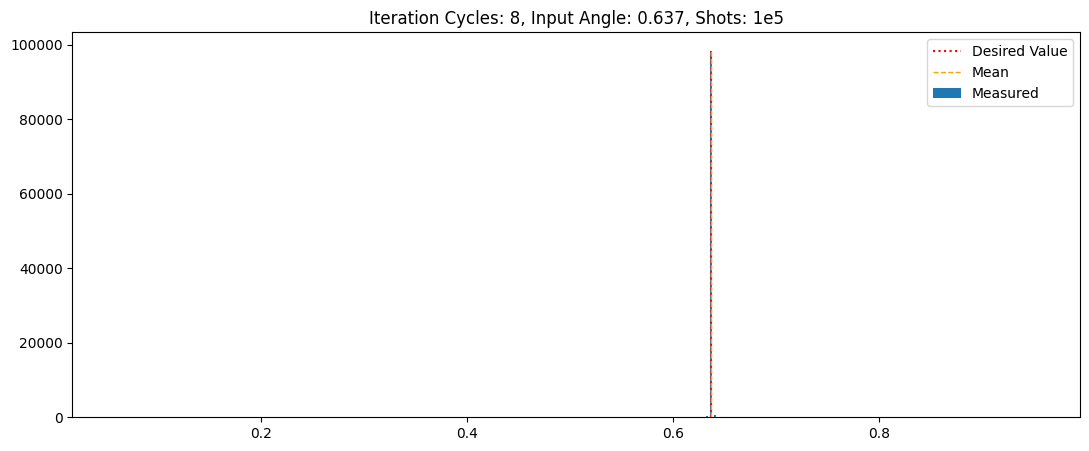

Difference between Mean of Mesurement and Desired Value:  0.00032089843749993907
Theoretical precision of QPE with the same depth:  0.00390625
Improvement by  12.172854534390625

 Difference between Maximum Value of Mesurement and Desired Value:  0.00028125000000001066
Improvement by  13.888888888888362


In [51]:
depth = 8
angle = 0.637
theta = 2*np.pi*angle
qc = iqpe(theta,depth)
#qc.draw("mpl")

from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1e5)
result = job.result()
counts = result.get_counts()
print(counts)

keys = counts.keys()
values = counts.values()

keys = [convert(i) for i in keys]
values = [i for i in values]

#print(keys)
#print(values)

fig, ax1 = plt.subplots(figsize=(13,5))

ax1 = plt.bar(keys, values, width = 2**(-depth-1), label="Measured")

avg= mean(keys, values)

plt.vlines(angle , 0 , max(values), color = "red", linestyle = "dotted", label = "Desired Value")
plt.vlines(avg, 0 , max(values), color='orange', linestyle='dashed', linewidth=1, label = "Mean")
plt.title("Iteration Cycles: 8, Input Angle: 0.637, Shots: 1e5")

plt.legend()
plt.show()

diff = np.abs(avg-angle)
print("Difference between Mean of Mesurement and Desired Value: ", diff)
theory = 2**(-depth)
print("Theoretical precision of QPE with the same depth: ", theory)
print("Improvement by ", theory/diff)

diff_max = diff_with_max(keys, values, angle)
print("\n Difference between Maximum Value of Mesurement and Desired Value: ", diff_max)
print("Improvement by ", theory/diff_max)

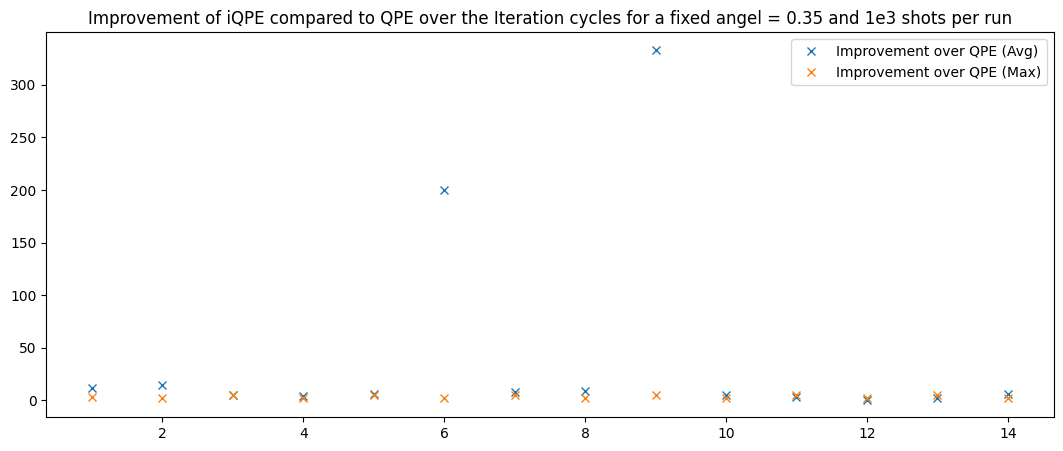

In [52]:
#Plotte Abweichung zum gesuchten Winkel in Abhängigkeit der Depth für fixed Winkel (Abwichung zum Average und zum Maximum Value)

overview = 15
angle = 0.35
list_improve_avg = []
list_improve_max = []
x = []
for i in range(1,overview):
    depth = i
    theta = 2*np.pi*angle
    qc = iqpe(theta,depth)

    sim = AerSimulator()
    job = sim.run(qc, shots=1e3)
    result = job.result()
    counts = result.get_counts()

    keys = counts.keys()
    values = counts.values()

    keys = [convert(i) for i in keys]
    values = [i for i in values]
    avg= mean(keys, values)
    diff = np.abs(avg-angle)
    theory = 2**(-depth)

    improve_avg = theory/diff
    list_improve_avg.append(improve_avg)

    diff_max = diff_with_max(keys, values, angle)
    improve_max= theory/diff_max
    list_improve_max.append(improve_max)

    x.append(i)

fig, ax = plt.subplots(figsize=(13,5))

ax = plt.plot(x, list_improve_avg, "x", label="Improvement over QPE (Avg)")
ax = plt.plot(x, list_improve_max, "x", label="Improvement over QPE (Max)")
plt.title("Improvement of iQPE compared to QPE over the Iteration cycles for a fixed angel = 0.35 and 1e3 shots per run")
plt.legend()

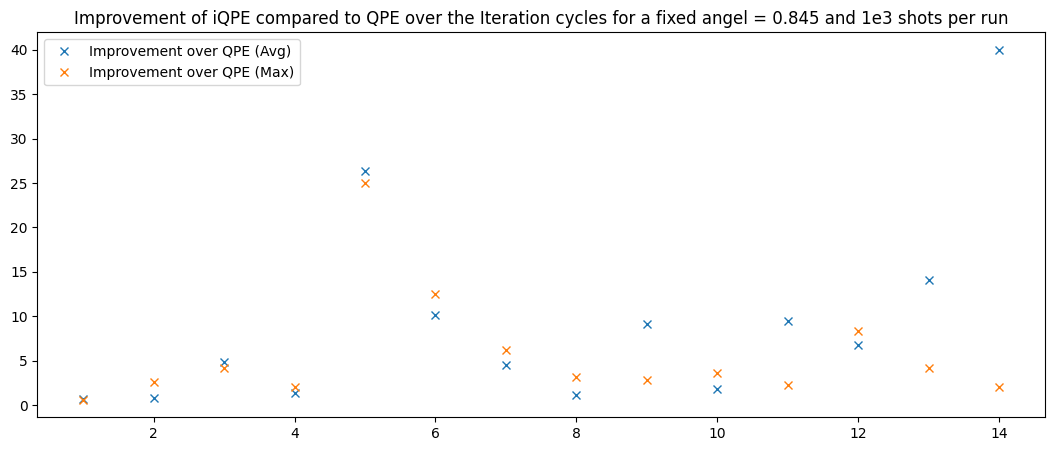

In [53]:
#Plotte Abweichung zum gesuchten Winkel in Abhängigkeit der Depth für fixed Winkel (Abwichung zum Average und zum Maximum Value)

overview = 15
angle = 0.845
list_improve_avg = []
list_improve_max = []
x = []
for i in range(1,overview):
    depth = i
    theta = 2*np.pi*angle
    qc = iqpe(theta,depth)

    sim = AerSimulator()
    job = sim.run(qc, shots=1e3)
    result = job.result()
    counts = result.get_counts()

    keys = counts.keys()
    values = counts.values()

    keys = [convert(i) for i in keys]
    values = [i for i in values]
    avg= mean(keys, values)
    diff = np.abs(avg-angle)
    theory = 2**(-depth)

    improve_avg = theory/diff
    list_improve_avg.append(improve_avg)

    diff_max = diff_with_max(keys, values, angle)
    improve_max= theory/diff_max
    list_improve_max.append(improve_max)

    x.append(i)

fig, ax = plt.subplots(figsize=(13,5))

ax = plt.plot(x, list_improve_avg, "x", label="Improvement over QPE (Avg)")
ax = plt.plot(x, list_improve_max, "x", label="Improvement over QPE (Max)")
plt.title("Improvement of iQPE compared to QPE over the Iteration cycles for a fixed angel = 0.845 and 1e3 shots per run")
plt.legend()

/tmp/ipykernel_3477/2074548489.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  improve_avg = theory/diff
/tmp/ipykernel_3477/2074548489.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  improve_max= theory/diff_max


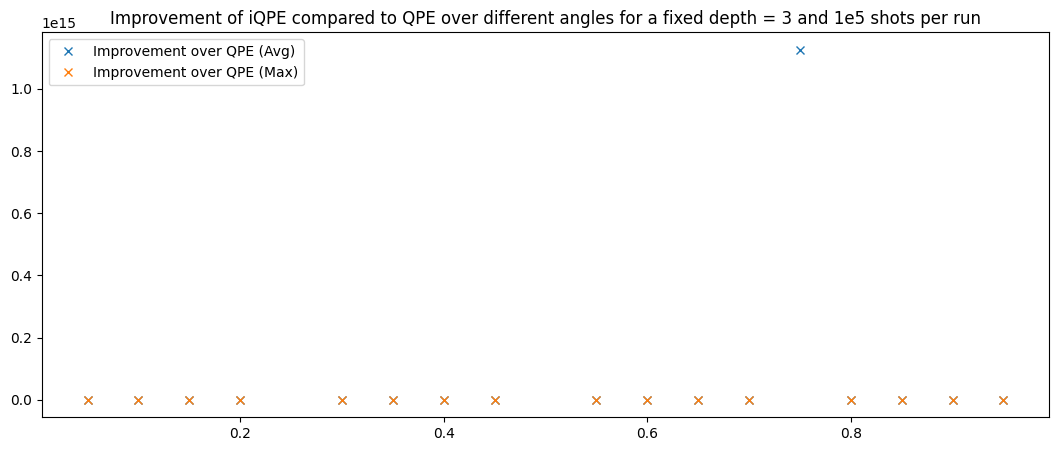

In [54]:
#Plotte Abweichung zum gesuchten Winkel in Abhängigkeit des Winkels für fixed Depth (Abwichung zum Average und zum Maximum Value)

depth = 3
slices = 20
list_improve_avg = []
list_improve_max = []
x = []
for i in range(1, slices):
    angle = (1/slices)*i
    theta = 2*np.pi*angle
    qc = iqpe(theta,depth)

    sim = AerSimulator()
    job = sim.run(qc, shots=1e5)
    result = job.result()
    counts = result.get_counts()

    keys = counts.keys()
    values = counts.values()

    keys = [convert(i) for i in keys]
    values = [i for i in values]
    avg= mean(keys, values)
    diff = np.abs(avg-angle)
    theory = 2**(-depth)

    improve_avg = theory/diff
    list_improve_avg.append(improve_avg)

    diff_max = diff_with_max(keys, values, angle)
    improve_max= theory/diff_max
    list_improve_max.append(improve_max)

    x.append(angle)

fig, ax = plt.subplots(figsize=(13,5))

ax = plt.plot(x, list_improve_avg, "x", label="Improvement over QPE (Avg)")
ax = plt.plot(x, list_improve_max, "x", label="Improvement over QPE (Max)")
plt.title("Improvement of iQPE compared to QPE over different angles for a fixed depth = 3 and 1e5 shots per run")
plt.legend()

/tmp/ipykernel_3477/3636644301.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  improve_avg = theory/diff
/tmp/ipykernel_3477/3636644301.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  improve_max= theory/diff_max


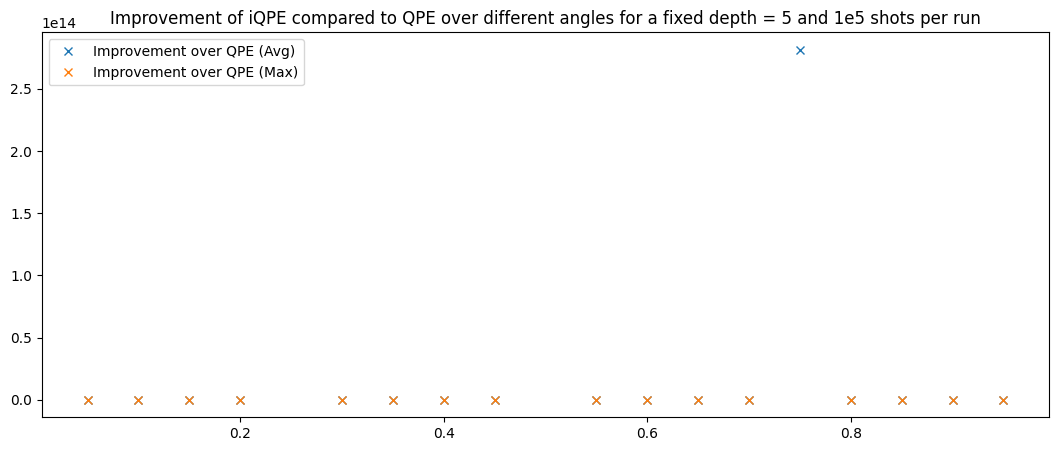

In [55]:
#Plotte Abweichung zum gesuchten Winkel in Abhängigkeit des Winkels für fixed Depth (Abweichung zum Average und zum Maximum Value)

depth = 5
slices = 20
list_improve_avg = []
list_improve_max = []
x = []
for i in range(1, slices):
    angle = (1/slices)*i
    theta = 2*np.pi*angle
    qc = iqpe(theta,depth)

    sim = AerSimulator()
    job = sim.run(qc, shots=1e5)
    result = job.result()
    counts = result.get_counts()

    keys = counts.keys()
    values = counts.values()

    keys = [convert(i) for i in keys]
    values = [i for i in values]
    avg= mean(keys, values)
    diff = np.abs(avg-angle)
    theory = 2**(-depth)

    improve_avg = theory/diff
    list_improve_avg.append(improve_avg)

    diff_max = diff_with_max(keys, values, angle)
    improve_max= theory/diff_max
    list_improve_max.append(improve_max)

    x.append(angle)

fig, ax = plt.subplots(figsize=(13,5))

ax = plt.plot(x, list_improve_avg, "x", label="Improvement over QPE (Avg)")
ax = plt.plot(x, list_improve_max, "x", label="Improvement over QPE (Max)")
plt.title("Improvement of iQPE compared to QPE over different angles for a fixed depth = 5 and 1e5 shots per run")
plt.legend()

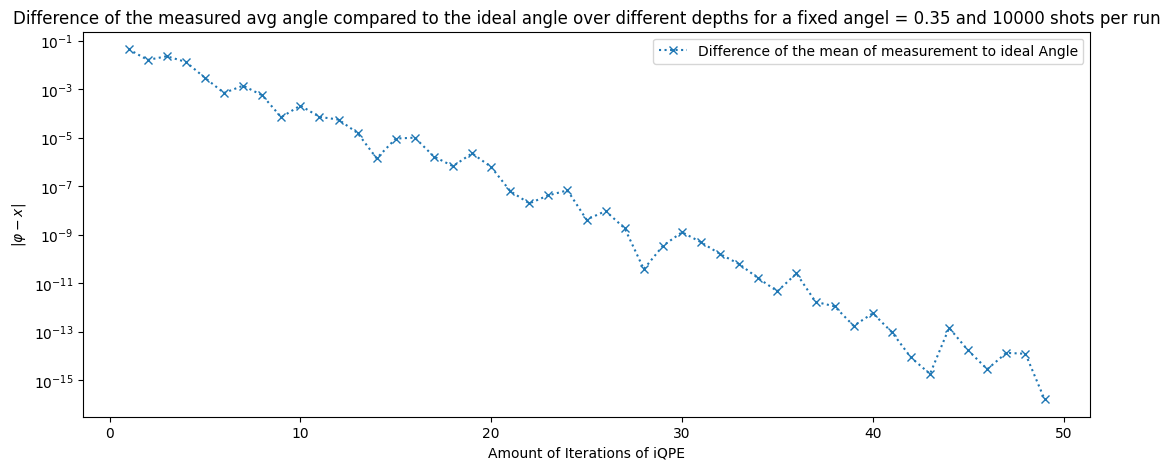

In [56]:
#Plotte Abweichung zum gesuchten Winkel in Abhängigkeit der Depth für fixed Winkel (So wie Leons Plot)

overview = 50
angle = 0.35
num = 1e4
list_diff = []
list_diff_max  = []
x = []
for i in range(1,overview):
    depth = i
    theta = 2*np.pi*angle
    qc = iqpe(theta,depth)

    sim = AerSimulator()
    job = sim.run(qc, shots=num)
    result = job.result()
    counts = result.get_counts()

    keys = counts.keys()
    values = counts.values()

    keys = [convert(i) for i in keys]
    values = [i for i in values]
    avg = mean(keys, values)
    diff = np.abs(avg-angle)
    list_diff.append(diff)

    diff_max = diff_with_max(keys, values, angle)
    list_diff_max.append(diff_max)

    x.append(i)

fig, ax = plt.subplots(figsize=(13,5))

ax = plt.plot(x, list_diff, "x", label="Difference of the mean of measurement to ideal Angle", linestyle = "dotted")
#ax = plt.plot(x, list_diff, "x", label="Difference of the max of measurement to ideal Angle", linestyle = "dotted")                #basically the same as with average

plt.title("Difference of the measured avg angle compared to the ideal angle over different depths for a fixed angel = {} and {} shots per run".format(angle, int(num)))
plt.yscale("log")
plt.ylabel(r"$\vert \overline \varphi - x \vert$")
plt.xlabel("Amount of Iterations of iQPE")
plt.legend()
#plt.savefig("test2.png", dpi = 300)
plt.show()

In [57]:
#Plot: Bei geforderter Präzision, wie reduziert sich die Anzahl der benötigten Shots geplotted über die Tiefe

def plot_requ_prec(precision: float, depth_range:int, angle: float, maxshots):
    list_shots = []
    x = []
    for i in range(1,depth_range):                                 #ab depth = 5 bekomme ich garantiert die 1e-4 precision, davor ist es Glückssache
        depth = i
        theta = 2*np.pi*angle
        qc = iqpe(theta,depth)

        sim = AerSimulator()
        for k in range(1,int(maxshots)):
            job = sim.run(qc, shots=k)
            result = job.result()
            counts = result.get_counts()

            keys = counts.keys()
            values = counts.values()

            keys = [convert(i) for i in keys]
            values = [i for i in values]
            avg = mean(keys, values)
            diff = np.abs(avg-angle)
            if diff <= precision:
                list_shots.append(k)
                break
            elif k==maxshots-1:
                list_shots.append(0)
                break
            else:
                continue

        x.append(i)

    fig, ax = plt.subplots(figsize=(13,5))

    ax = plt.plot(x, list_shots, "x", label="Shots needed", linestyle = "dotted")
    #ax = plt.plot(x, list_diff, "x", label="Difference of the max of measurement to ideal Angle", linestyle = "dotted")                #basically the same as with average

    plt.title("Amount of shots needed to achieve precision of {} for a fixed angle = {}".format(precision,angle))
    #plt.yscale("log")
    plt.ylabel("Shots required")
    plt.xlabel("Amount of Iterations of iQPE")
    plt.legend()

#plot_requ_prec(1e-3,20,0.33,1e3)

#plt.savefig("test6.png", dpi = 300)

In [58]:
#plot_requ_prec(1e-4,20,0.33,1e3)

#plt.savefig("test7.png", dpi = 300)

In [59]:
#plot_requ_prec(1e-5,20,0.33,1e3)

#plt.savefig("test8.png", dpi = 300)

In [60]:
#plot_requ_prec(1e-6,20,0.33,1e3)

#plt.savefig("test9.png", dpi = 300)

In [61]:
#plot_requ_prec(1e-7,20,0.33,1e3)

#plt.savefig("test10.png", dpi = 300)

In [62]:
#Plots, bei denen bei fester Depth die Präzision per Shotzahl geplottet wird

def plot_prec_per_shots(depth: int, start: float, end: float, angle: float, steps: float):
    maxshots = int(end)
    list = []
    x = []
    for k in range(int(start),maxshots, int(steps)):                                
        theta = 2*np.pi*angle
        qc = iqpe(theta,depth)
        sim = AerSimulator()
        job = sim.run(qc, shots=k)
        result = job.result()
        counts = result.get_counts()

        keys = counts.keys()
        values = counts.values()

        keys = [convert(i) for i in keys]
        values = [i for i in values]
        avg = mean(keys, values)
        diff = np.abs(avg-angle)
        list.append(diff)

        x.append(k)
    fig, ax = plt.subplots(figsize=(13,5))

    ax = plt.plot(x, list, "x", label="Precision", linestyle = "dotted")
    #ax = plt.plot(x, list_diff, "x", label="Difference of the max of measurement to ideal Angle", linestyle = "dotted")                #basically the same as with average

    plt.title(r"Difference of mean of each run $\overline \varphi$ compared to the ideal angle $x$ plotted for different many shots for fixed depth d = {} and $x$ = {}".format(depth, angle))
    plt.yscale("log")
    plt.ylabel(r"$\vert \overline \varphi - x \vert$")
    plt.xlabel("Shots")
    plt.legend()

In [63]:
#plot_prec_per_shots(5, 1, 1e4, 0.6, 1)

#plt.savefig("test11.png", dpi = 300)

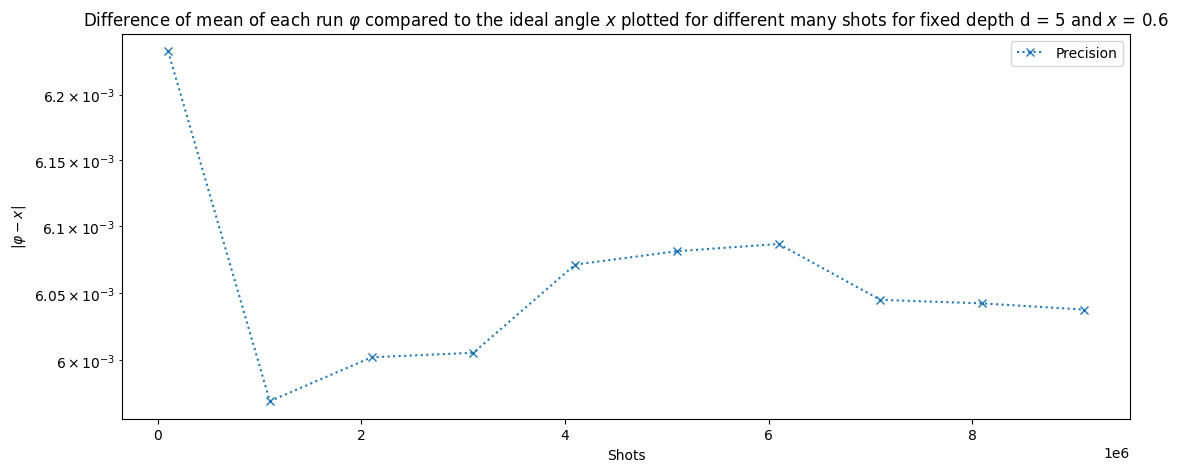

In [64]:
plot_prec_per_shots(5, 1e5, 1e7, 0.6, 1e6)

In [67]:
#Plots: Präzision(winkel), feste Shotzahl und Depth

def plot_prec_over_angle(depth:int, num: float, steps: int):
    list = []
    x = []
    angle = np.linspace(0,1,steps)
    for k in range(len(angle)-2):                                
        theta = 2*np.pi*(angle[k+1])
        qc = iqpe(theta,depth)
        sim = AerSimulator()
        job = sim.run(qc, shots=int(num))
        result = job.result()
        counts = result.get_counts()

        keys = counts.keys()
        values = counts.values()

        keys = [convert(i) for i in keys]
        values = [i for i in values]
        avg = mean(keys, values)
        diff = np.abs(avg-angle[k+1])
        list.append(diff)
        x.append(angle[k])
    fig, ax = plt.subplots(figsize=(13,5))
    ax = plt.plot(x, list, "x", label="Precision", linestyle = "dotted")
    plt.title(r"Difference of mean of each run $\overline \varphi$ compared to the ideal angle $x$ plotted for different angles $\overline \varphi$ for fixed depth d = {} and shots = {}".format(depth, int(num)))
    plt.yscale("log")
    plt.ylabel(r"$\vert \overline \varphi - x \vert$")
# plt.savefig("test13.png", dpi = 300)
    plt.legend()



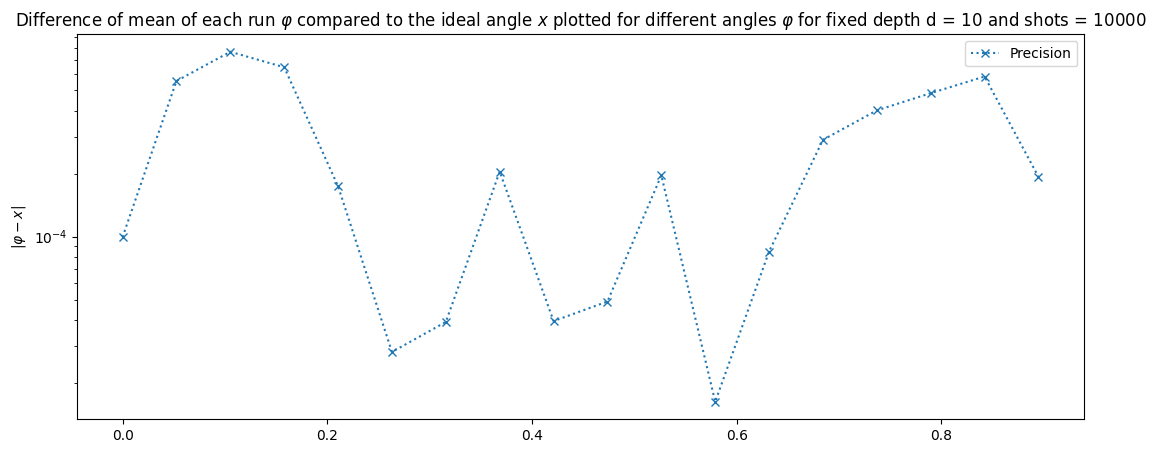

In [69]:
plot_prec_over_angle(10, 1e4, 20)
# plt.savefig("test13.png", dpi = 300)

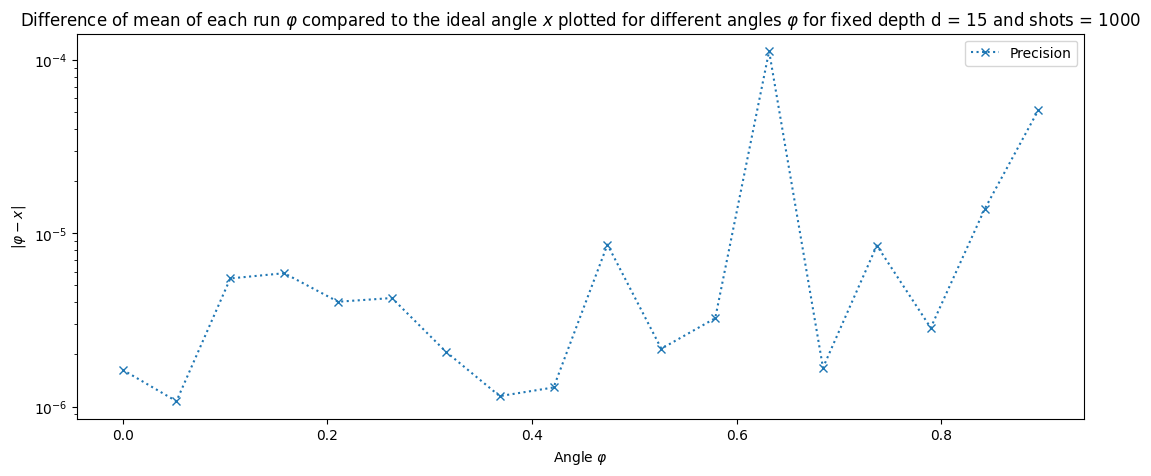

In [ ]:
# plot_prec_over_angle(15, 1e4, 20)
# plt.savefig("test14.png", dpi = 300)

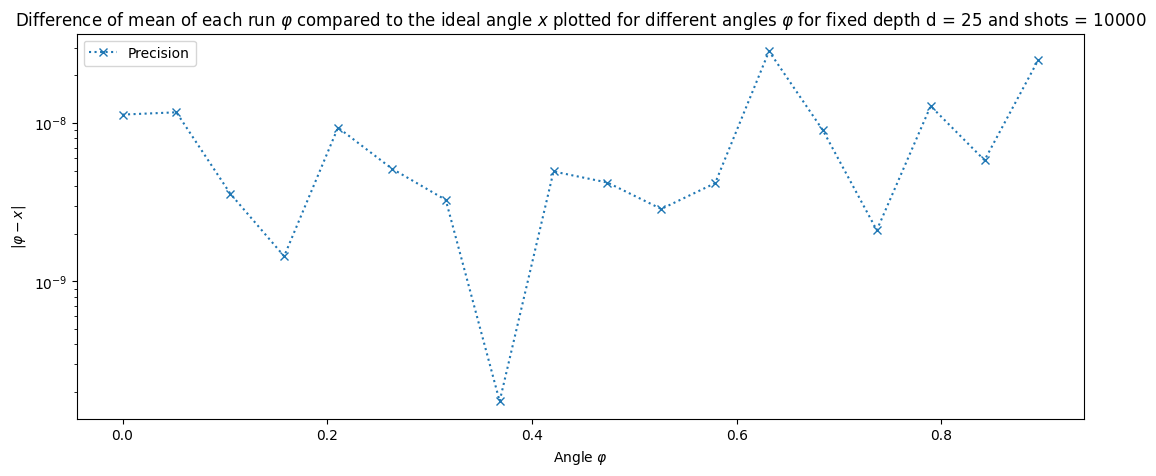

In [ ]:
# plot_prec_over_angle(25, 1e4, 20)
# plt.savefig("test15.png", dpi = 300)

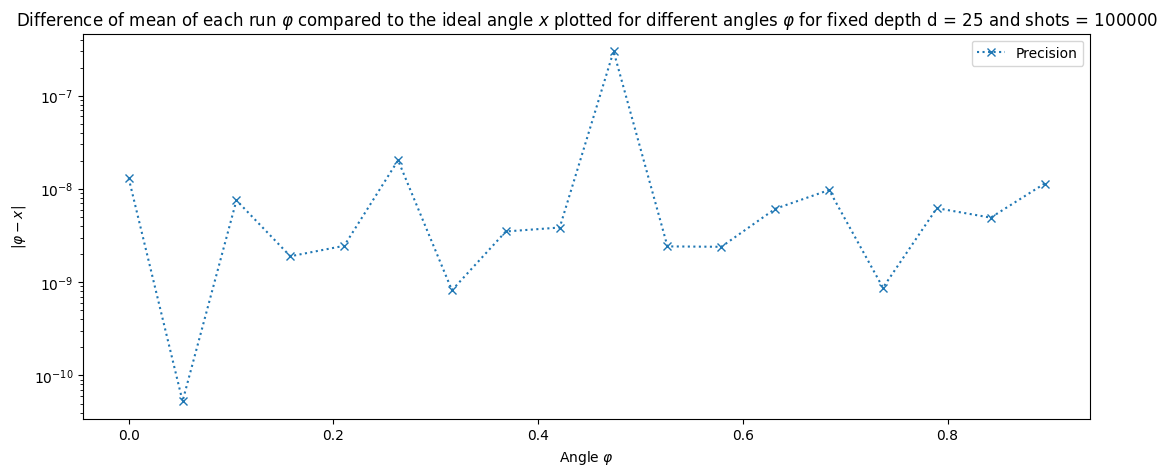

In [ ]:
# plot_prec_over_angle(25, 1e5, 20)
# plt.savefig("test16.png", dpi = 300)

In [70]:
#Plot: Depth(Shots) bei fester Präzision und Winkel

def plot_depth_over_shots(precision:float, angle:float, maxdepth:int, shots_range:int, steps:int):
    list_depth = []
    x = []
    theta = 2*np.pi*angle
    stepss = np.linspace(0,shots_range,steps)

    for i in range(1,len(stepss)):

        for k in range(1,maxdepth):
            qc = iqpe(theta,k)
            sim = AerSimulator()
            job = sim.run(qc, shots=stepss[i])
            result = job.result()
            counts = result.get_counts()

            keys = counts.keys()
            values = counts.values()

            keys = [convert(i) for i in keys]
            values = [i for i in values]
            avg = mean(keys, values)
            diff = np.abs(avg-angle)
            if diff <= precision:
                list_depth.append(k)
                break
            elif k==maxdepth-1:
                list_depth.append(0)
                break
            else:
                continue
        x.append(stepss[i])

    fig, ax = plt.subplots(figsize=(13,5))

    ax = plt.plot(x, list_depth, "x", label="Depth of Circuit", linestyle = "dotted")
    #ax = plt.plot(x, list_diff, "x", label="Difference of the max of measurement to ideal Angle", linestyle = "dotted")                #basically the same as with average

    plt.title("Depth needed to achieve precision of {} for a fixed angle = {}".format(precision,angle))
    #plt.yscale("log")
    plt.ylabel("Depth")
    plt.ylim(0,maxdepth)
    plt.xlabel("Amount of Shots per Run")
    plt.legend()

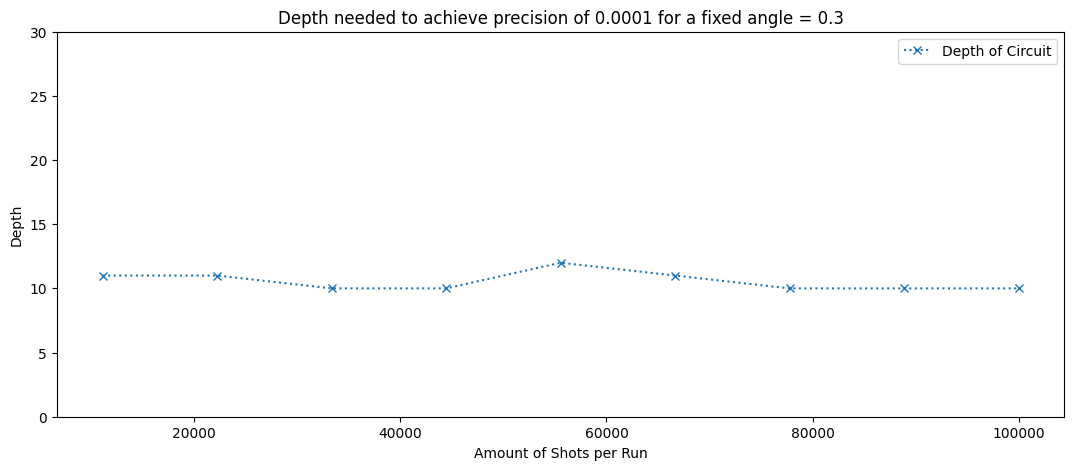

In [71]:
plot_depth_over_shots(1e-4, 0.3, 30, int(1e5), 10)

plt.savefig("test17.png", dpi = 300)

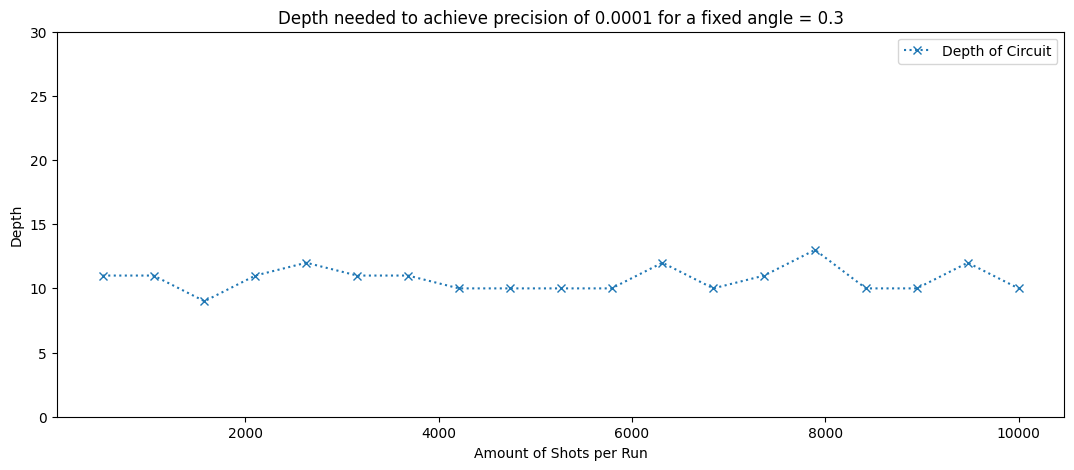

In [72]:
plot_depth_over_shots(1e-4, 0.3, 30, int(1e4), 20)

plt.savefig("test18.png", dpi = 300)

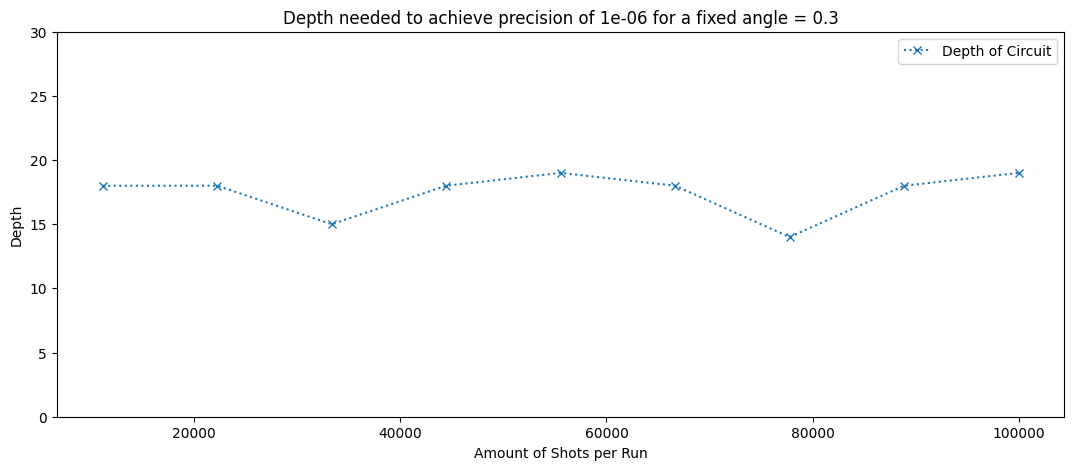

In [73]:
plot_depth_over_shots(1e-6, 0.3, 30, int(1e5), 10)

plt.savefig("test19.png", dpi = 300)

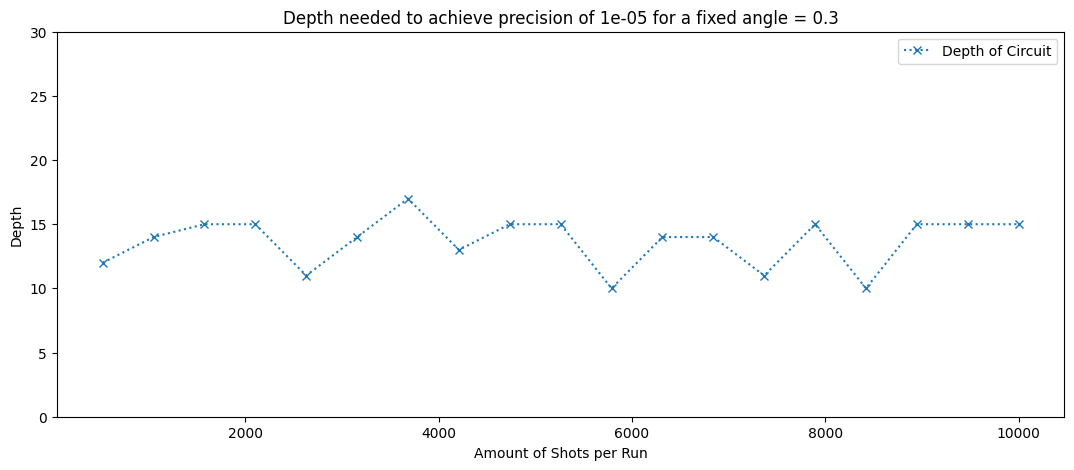

In [74]:
plot_depth_over_shots(1e-5, 0.3, 30, int(1e4), 20)

plt.savefig("test20.png", dpi = 300)

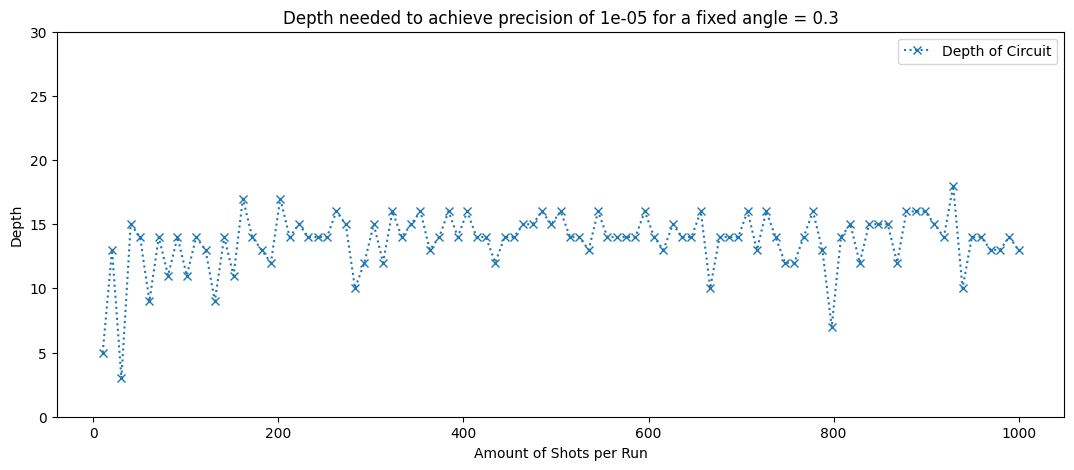

In [75]:
plot_depth_over_shots(1e-5, 0.3, 30, int(1e3), 100)

plt.savefig("test21.png", dpi = 300)

In [76]:
#Plot: Depth(Winkel) bei fester Shotzahl und fester precision

def plot_depth_over_angle(precision:float, maxdepth:int, start:float, end: float, steps:int, shotss: float):
    list_depth = []
    x = []
    angles = np.linspace(start,end,steps)

    for i in range(1,len(angles)-1):
        theta = 2*np.pi*angles[i]
        for k in range(1,maxdepth):
            qc = iqpe(theta,k)
            sim = AerSimulator()
            job = sim.run(qc, shots=int(shotss))
            result = job.result()
            counts = result.get_counts()

            keys = counts.keys()
            values = counts.values()

            keys = [convert(i) for i in keys]
            values = [i for i in values]
            avg = mean(keys, values)
            diff = np.abs(avg-angles[i])
            if diff <= precision:
                list_depth.append(k)
                break
            elif k==maxdepth-1:
                list_depth.append(0)
                break
            else:
                continue
        x.append(angles[i])

    fig, ax = plt.subplots(figsize=(13,5))

    ax = plt.plot(x, list_depth, "x", label="Depth of Circuit", linestyle = "dotted")
    #ax = plt.plot(x, list_diff, "x", label="Difference of the max of measurement to ideal Angle", linestyle = "dotted")                #basically the same as with average

    plt.title(r"Depth needed to achieve precision of {} over input angle $\overline \varphi$ for fixed shots = {}".format(precision, int(shotss)))
    #plt.yscale("log")
    plt.ylabel("Depth")
    #plt.ylim(0,maxdepth)
    plt.xlabel(r"Angle $\overline \varphi$")
    plt.legend()

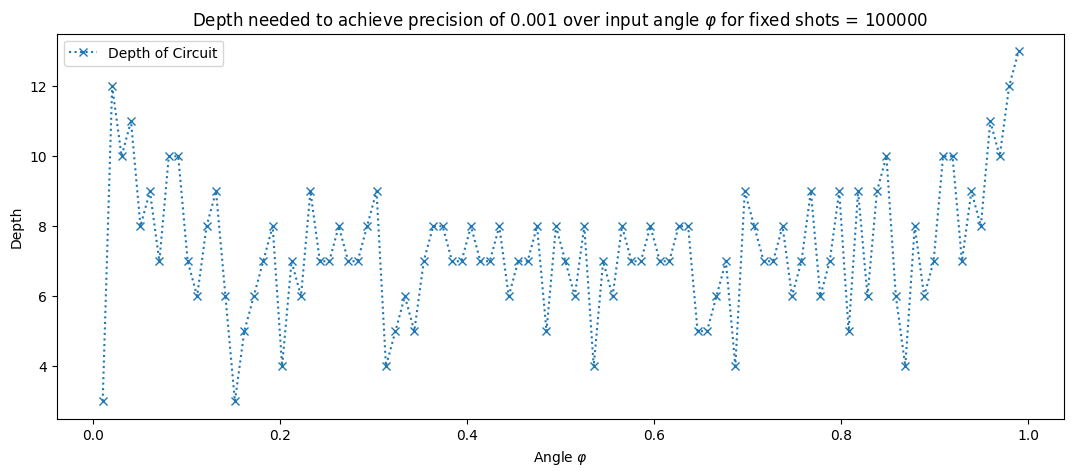

In [77]:
plot_depth_over_angle(1e-3, 20, 0, 1, 100, 1e5)
plt.savefig("test22.png", dpi = 300)

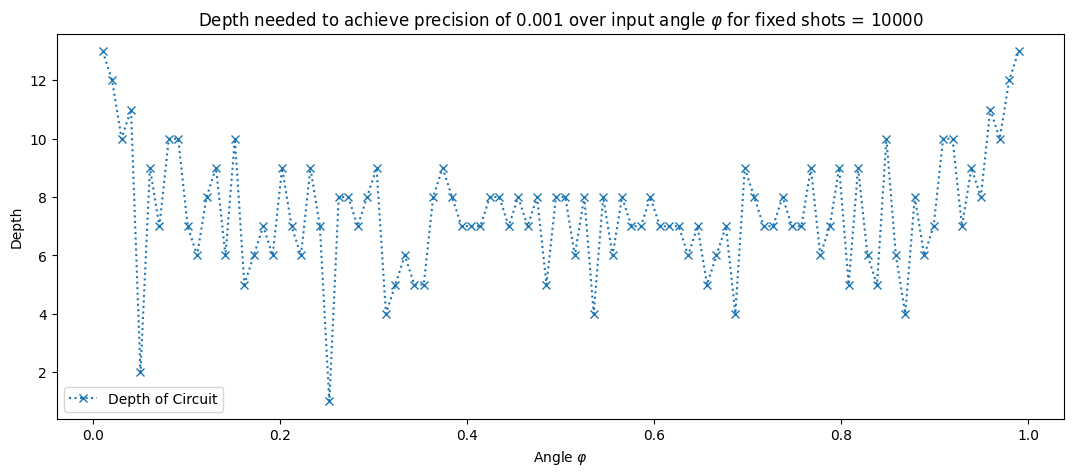

In [78]:
plot_depth_over_angle(1e-3, 20, 0, 1, 100, 1e4)
plt.savefig("test23.png", dpi = 300)

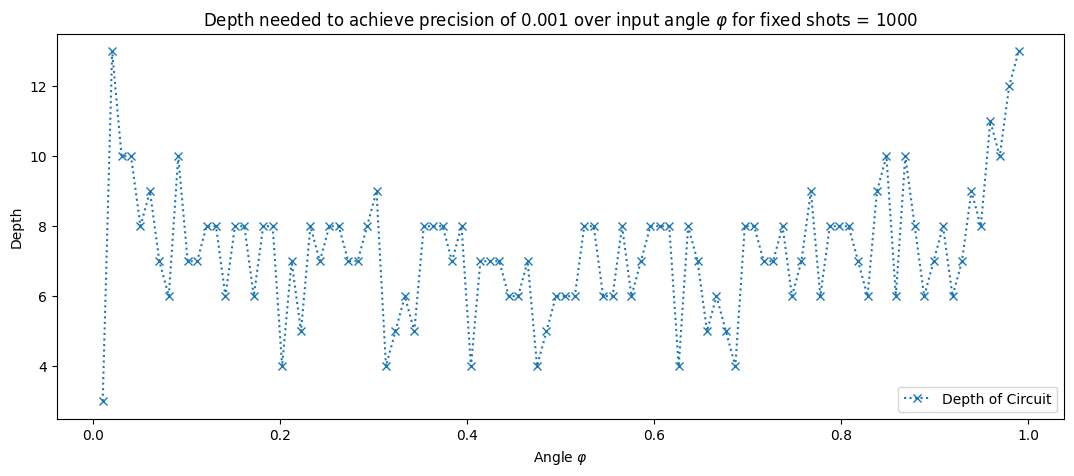

In [79]:
plot_depth_over_angle(1e-3, 20, 0, 1, 100, 1e3)
plt.savefig("test24.png", dpi = 300)

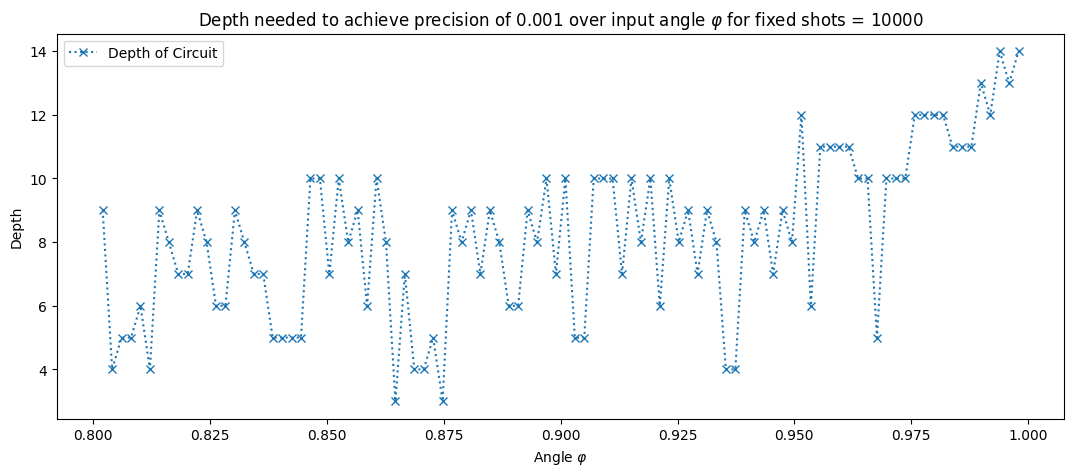

In [80]:
plot_depth_over_angle(1e-3, 20, 0.8, 1, 100, 1e4)
plt.savefig("test25.png", dpi = 300)

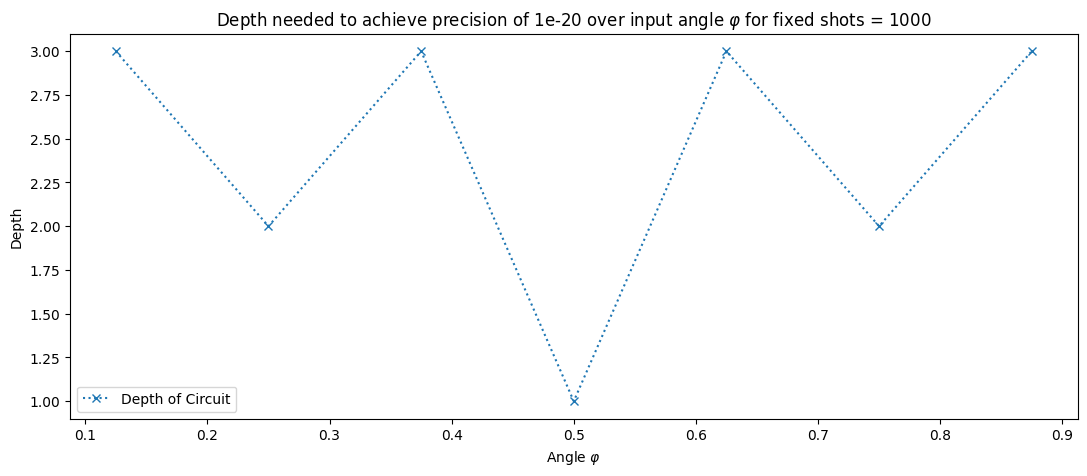

In [81]:
plot_depth_over_angle(1e-20, 20, 0, 1, 9, 1e3)
plt.savefig("test26.png", dpi = 300)